## News

Contents: 

__Selected queries with functions__

Five single aggregation queries that work:

1. Filter by section and period -> display journalists with number of docs per each. 
    Plot: bar plot
2. Filter by section and period -> display persons with number of docs per each. 
    Plot: bar plot
3. Filter by section -> display number of documents per day	
    Plot: histogram?
4. Filter by period -> Get number of articles in each section
    Plot: pie plot?
5. Filter by section and perod -> get description facet	
    Plot: pie plot?

__Query with multiple aggregations fitted into a dataframe__

__All the other queries__

## Selected queries with functions

#### Simple queries

1. Filter by section and period -> display journalists with number of docs per each

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/3974566479.py:52: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key,doc_count
0,By Cassandra Vinograd,7
1,By Anatoly Kurmanaev,5
2,By Isabel Kershner,5
3,,4
4,By Anushka Patil,3


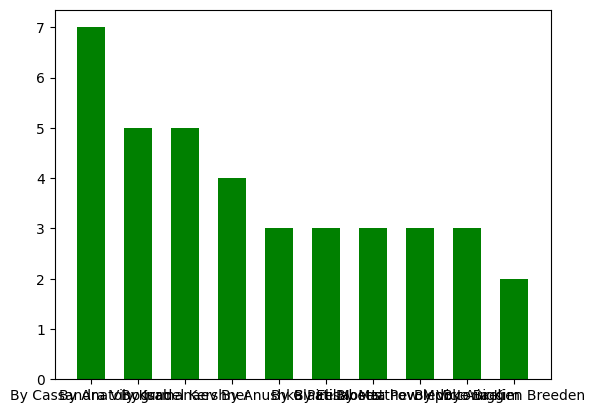

In [236]:

import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(section: str, time_scale: str = "yesterday") :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")
  
  if time_scale == "yesterday":
    today = date.today()
    start_date = today - timedelta(days = 1)
    end_date = today

  if time_scale == "week_ago":
    today = date.today()
    start_date = today - timedelta(days = 7)
    end_date = today

  if time_scale == "month_ago":
    today = date.today()
    start_date = today - timedelta(days = 30)
    end_date = today


# Filter by section and period -> display journalists with number of docs per each
  query_body = {
  "query": {
    "bool": {
      "filter": [
        {"term": { "section": f"{section}" }},
        {"range": { "first_published_date": {
              "gte": f"{start_date}", 
              "lte": f"{end_date}" }}}
          ]
        }
    },
    "size":0,
    "aggs": {
          "articles_per_author": {
            "terms": {
                "field": "byline.keyword",
                "size": 10
                    }
                }
        }  
}

  result = es.search(index="news", body=query_body)
  result = json.dumps(result["aggregations"]["articles_per_author"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df.head())

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)


query_agg(section="World", time_scale="month_ago")

2. Filter by section and period -> display persons with number of docs per each

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/900625686.py:52: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key,doc_count
0,"Roberts, John G Jr",2
1,"Alito, Samuel A Jr",1
2,"Biden, Joseph R Jr",1
3,"Gorsuch, Neil M",1
4,"Jackson, Ketanji Brown (1970- )",1


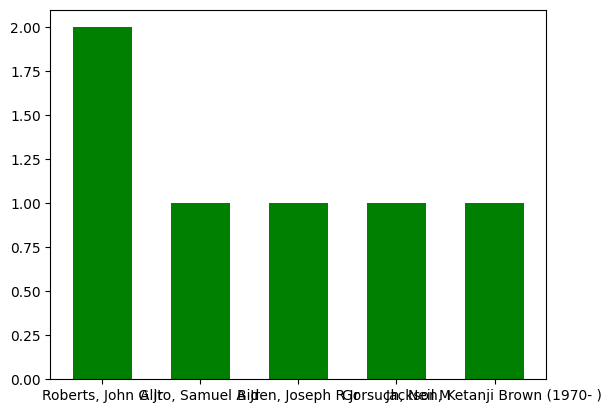

In [240]:

import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(section: str, time_scale: str = "yesterday") :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")
  
  if time_scale == "yesterday":
    today = date.today()
    start_date = today - timedelta(days = 1)
    end_date = today

  if time_scale == "week_ago":
    today = date.today()
    start_date = today - timedelta(days = 7)
    end_date = today

  if time_scale == "month_ago":
    today = date.today()
    start_date = today - timedelta(days = 30)
    end_date = today


# Filter by section and period -> display persons with number of docs per each
  query_body = {
  "query": {
    "bool": {
      "filter": [
        {"term": { "section": f"{section}" }},
        {"range": { "first_published_date": {
              "gte": f"{start_date}", 
              "lte": f"{end_date}" }}}
          ]
        }
    },
    "size":0,
    "aggs": {
            "persons": {
                "terms": {
                    "field": "per_facet",
                    "size": 5
                  }
              }
          }
}

  result = es.search(index="news", body=query_body)
  result = json.dumps(result["aggregations"]["persons"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df.head())

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)


query_agg(section="Opinion", time_scale="yesterday")

3. Filter by section -> display number of documents per day

In [244]:

import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(section: str, step: str = "day") :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")


# Filter by section and period -> display persons with number of docs per each. Changeable parameter - 
# step. Step can be "day", "month", "quarter", "year"
  query_body = {
  "query": {
    "bool": {
      "filter": [
        {"term": { "section": f"{section}" }}]
        }
    },
    "size":0,
    "aggregations": {
            "articles_over_time": {
                "date_histogram": {
                    "field": "first_published_date",
                    "calendar_interval": f"{step}"}
             }                      
    }  
}

  result = es.search(index="news", body=query_body)
  result = json.dumps(result["aggregations"]["articles_over_time"]["buckets"])
  
  #Pandas.read_json

  df = pd.read_json(result)
  display(df.head())


  #pprint(result.body)
# line plot

query_agg(section="U.S.", step="hour")

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/3455321323.py:33: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key_as_string,key,doc_count
0,2023-07-01T09:00:00.000Z,1688202000000,4
1,2023-07-01T10:00:00.000Z,1688205600000,0
2,2023-07-01T11:00:00.000Z,1688209200000,1
3,2023-07-01T12:00:00.000Z,1688212800000,0
4,2023-07-01T13:00:00.000Z,1688216400000,0


4. Filter by period -> Get number of articles in each section

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/2881614219.py:51: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key,doc_count
0,World,120
1,U.S.,114
2,Opinion,97
3,Business,80
4,Sports,71


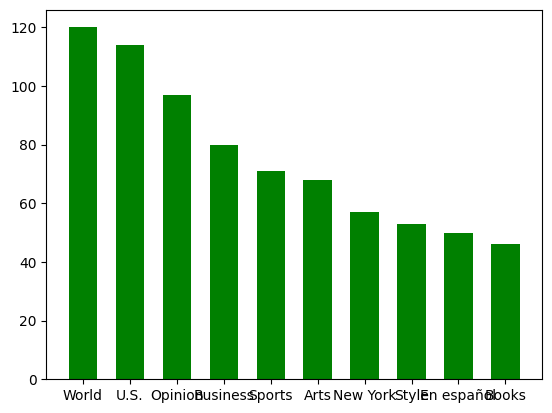

In [248]:

import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(time_scale: str = "yesterday") :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")
  
  if time_scale == "yesterday":
    today = date.today()
    start_date = today - timedelta(days = 1)
    end_date = today

  if time_scale == "week_ago":
    today = date.today()
    start_date = today - timedelta(days = 7)
    end_date = today

  if time_scale == "month_ago":
    today = date.today()
    start_date = today - timedelta(days = 30)
    end_date = today


# Filter by period -> display number of articles in each section
  query_body = {
  "query": {
    "bool": {
      "filter": [
        {"range": { "first_published_date": {
              "gte": f"{start_date}", 
              "lte": f"{end_date}" }}}
          ]
        }
    },
    "size":0,
    "aggs": {
      "articles_per_section": {
          "terms": {
            "field": "section",
            "size": 10
                  }
              }
          }
}

  result = es.search(index="news", body=query_body)
  result = json.dumps(result["aggregations"]["articles_per_section"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df.head())

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)
 # pie chart

query_agg(time_scale="month_ago")

5. Filter by section and perod -> get description facet

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/41915558.py:52: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key,doc_count
0,Russian Invasion of Ukraine (2022),30
1,Defense and Military Forces,16
2,International Relations,16
3,Politics and Government,15
4,Deaths (Fatalities),9


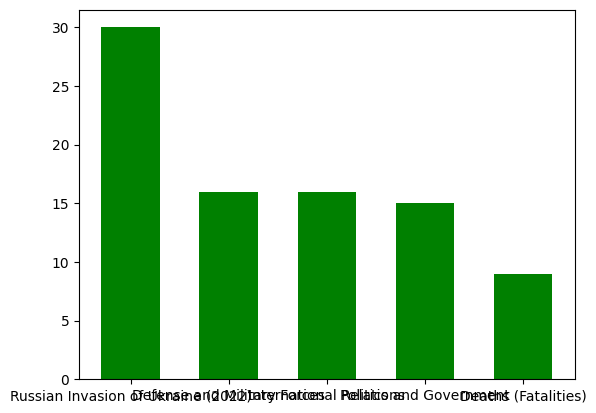

In [253]:

import json
import pandas as pd
from pprint import pprint
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt

def query_agg(section: str, time_scale: str = "yesterday") :

  from elasticsearch import Elasticsearch
  es = Elasticsearch(hosts = "http://@localhost:9200")
  
  if time_scale == "yesterday":
    today = date.today()
    start_date = today - timedelta(days = 1)
    end_date = today

  if time_scale == "week_ago":
    today = date.today()
    start_date = today - timedelta(days = 7)
    end_date = today

  if time_scale == "month_ago":
    today = date.today()
    start_date = today - timedelta(days = 30)
    end_date = today


# Filter by section and period -> display description facets with number of docs per each
  query_body = {
  "query": {
    "bool": {
      "filter": [
        {"term": { "section": f"{section}" }},
        {"range": { "first_published_date": {
              "gte": f"{start_date}", 
              "lte": f"{end_date}" }}}
          ]
        }
    },
    "size":0,
    "aggs": {
            "description_facet": {
                "terms": {
                    "field": "des_facet",
                    "size": 5
                  }
              }
          }
}

  result = es.search(index="news", body=query_body)
  result = json.dumps(result["aggregations"]["description_facet"]["buckets"])

  #Pandas.read_json

  df = pd.read_json(result)
  display(df.head())

  plt.bar(df["key"], df["doc_count"] , color = 'green', width = 0.6)
  plt.show()
  #pprint(result.body)


query_agg(section="World", time_scale="month_ago")

## Query with multiple aggregations fitted into a dataframe
Doesn't really work for building plots. Nice plots for this query would be:

https://media.geeksforgeeks.org/wp-content/uploads/20210216145547/Multiplebarchart3.png - multiple bars where each bar is a person

https://i.stack.imgur.com/T2Hvd.png  - subplots where each subplot is a different week/day/month

In [257]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from elasticsearch import Elasticsearch

# Filter by section and period of time -> Aggregation by week -> aggregation by person (number of docs per person)
es = Elasticsearch(hosts="http://localhost:9200")
query_body = {
  "query": {
    "bool": {
      "filter": [
        {"term": { "section": "U.S." }},
        {"range": { "first_published_date": {
              "gte": "2023-07-01", 
              "lte": "now" }}}
          ]
        }
  },
  "size":0,
  "aggs": {
        "articles_over_time": {
          "date_histogram": {
            "field": "first_published_date",
            "calendar_interval": "week"
          },
          "aggs": {
            "persons": {
                "terms": {
                    "field": "per_facet",
                    "size": 5
                  }
              }
          }
        }
      }
}

result = es.search(index="news", body=query_body)
result.body

#df = pd.read_json(json.dumps(result["aggregations"]["articles_over_time"]["buckets"]))
df = pd.json_normalize(result["aggregations"]["articles_over_time"]["buckets"], sep="_")
df = df.explode("persons_buckets")
df = pd.concat([df.drop(['persons_buckets', "key", "persons_doc_count_error_upper_bound", "doc_count", "persons_sum_other_doc_count"], axis=1), 
           df['persons_buckets'].apply(pd.Series)], axis=1)
df



/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/3402771364.py:39: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key_as_string,key,doc_count
0,2023-06-26T00:00:00.000Z,"Trump, Donald J",4
0,2023-06-26T00:00:00.000Z,"Biden, Joseph R Jr",3
0,2023-06-26T00:00:00.000Z,"Biden, Hunter",2
0,2023-06-26T00:00:00.000Z,"Drozdov, Darren",2
0,2023-06-26T00:00:00.000Z,"Scott, Brandon M (1984- )",2
1,2023-07-03T00:00:00.000Z,"Trump, Donald J",15
1,2023-07-03T00:00:00.000Z,"Biden, Joseph R Jr",13
1,2023-07-03T00:00:00.000Z,"DeSantis, Ron",11
1,2023-07-03T00:00:00.000Z,"Ramaswamy, Vivek (1985- )",3
1,2023-07-03T00:00:00.000Z,"Burgum, Douglas",2


## All the other queries

All queries and aggregations created to study the database

In [183]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

# Generic queries to display index/mapping

# show documents of an index; increment "size" argument to display more than 100 docs)
#result = es.search(index="news", size=100)

# show mapping of an index
#result = es.indices.get_mapping(index="news")

# simple query to mach any filed with any value
query_body = {"query": { "match": { "section": "Movies"}}}
result = es.search(index="news", body=query_body)

result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/4100483443.py:14: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 23,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 38, 'relation': 'eq'},
  'max_score': 3.6922636,
  'hits': [{'_index': 'news',
    '_id': 'i_T9FokBjyXhjzYuQZa9',
    '_score': 3.6922636,
    '_source': {'slug_name': '30netflix-leaving',
     'section': 'Movies',
     'subsection': '',
     'title': 'Stream These 8 Movies Before They Leave Netflix in July',
     'abstract': 'The best James Bond movie of recent years is among a handful of great titles leaving soon for U.S. subscribers.',
     'uri': 'nyt://article/81e3ed9d-1bd2-555a-8232-9459af78d603',
     'url': 'https://www.nytimes.com/2023/06/30/movies/netflix-expiring-july-skyfall-streaming.html',
     'byline': 'By Jason Bailey',
     'item_type': 'Article',
     'source': 'New York Times',
     'updated_date': '2023-06-30T11:33:57-04:00',
     'created_date': '2023-06-30T11:33:57-04:00',
     'published_date': '2023-06-30T11:33:57-04:00',
     'fi

In [180]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

# Number of documents per sesction
query_body = {
  "size": "0",
  "aggs": {
    "unique_section": {
      "terms": {
        "field": "section",
        "size": 100
      }
    }
  }
}
result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/531687840.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 7,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1490, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_section': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'World', 'doc_count': 120},
    {'key': 'U.S.', 'doc_count': 114},
    {'key': 'Opinion', 'doc_count': 97},
    {'key': 'Business', 'doc_count': 80},
    {'key': 'Sports', 'doc_count': 71},
    {'key': 'Arts', 'doc_count': 68},
    {'key': 'New York', 'doc_count': 57},
    {'key': 'Style', 'doc_count': 53},
    {'key': 'En español', 'doc_count': 50},
    {'key': 'Books', 'doc_count': 46},
    {'key': 'Briefing', 'doc_count': 46},
    {'key': 'Real Estate', 'doc_count': 42},
    {'key': 'Food', 'doc_count': 40},
    {'key': 'Movies', 'doc_count': 38},
    {'key': 'Podcasts', 'doc_count': 36},
    {'key': 'Corrections', 'doc_count': 34},
    {'key': 'Health', 'doc_count': 33},


In [15]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

# Number of sections in the news index (unique values)
query_body ={
  "size": 0, 
  "aggs": {
    "unique_sections": {
        "cardinality": {
          "field": "section"
        }
    }
  }
}
result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/480717713.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 7,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_sections': {'value': 42}}}

In [42]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# Number of articles per author
query_body = {
    "size": 0,
    "aggs": {
        "articles_per_author": {
            "terms": {
                "field": "byline.keyword",
                "size": 10
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1301780699.py:18: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 81,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'articles_per_author': {'doc_count_error_upper_bound': 4,
   'sum_other_doc_count': 552,
   'buckets': [{'key': '', 'doc_count': 82},
    {'key': 'By The Learning Network', 'doc_count': 20},
    {'key': 'By Ann Carrns', 'doc_count': 10},
    {'key': 'By Alex Traub', 'doc_count': 6},
    {'key': 'By Amelia Nierenberg', 'doc_count': 5},
    {'key': 'By New York Times Audio', 'doc_count': 5},
    {'key': 'By Ron Lieber', 'doc_count': 5},
    {'key': 'By Catherine Pearson', 'doc_count': 4},
    {'key': 'By Emily Anthes', 'doc_count': 4},
    {'key': 'By Eve Washington, Josh Katz and Tom Giratikanon',
     'doc_count': 4}]}}}

In [44]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# Number of articles per author per section: section -> author
query_body = {
    "size": 0,
    "aggs": {
        "sections": {
            "terms": {
                "field": "section",
                "size": 100
            },
            "aggs": {
                "articles_per_author": {
                  "terms": {
                      "field": "byline.keyword",
                      "size": 10
                  }
               }
             }
     }
  }
}
    


result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1410766957.py:28: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 64,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_section': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'Arts',
     'doc_count': 20,
     'articles_per_author': {'doc_count_error_upper_bound': 0,
      'sum_other_doc_count': 10,
      'buckets': [{'key': '', 'doc_count': 1},
       {'key': 'By Aruna D’Souza', 'doc_count': 1},
       {'key': 'By Ben Miller', 'doc_count': 1},
       {'key': 'By Christopher Kuo', 'doc_count': 1},
       {'key': 'By Danielle Dowling', 'doc_count': 1},
       {'key': 'By David Belcher', 'doc_count': 1},
       {'key': 'By Farah Nayeri', 'doc_count': 1},
       {'key': 'By Imogen West-Knights', 'doc_count': 1},
       {'key': 'By James Poniewozik, Wesley Morris and Lindsay Zoladz',
        'doc_count': 1},
       {'key': 'By Jason Zinoman', 'doc_cou

In [47]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# Number of articles per author per section: author -> section
query_body = {
    "size": 0,
    "aggs": {
        "articles_per_author": {
            "terms": {
                "field": "byline.keyword",
                "size": 10
            },
            "aggs": {
                "secitons": {
                    "terms": {
                        "field": "section",
                        "size": 100
                    }
                    }
                }
             }
        }
    }

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/3826472704.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 284,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'articles_per_author': {'doc_count_error_upper_bound': 4,
   'sum_other_doc_count': 552,
   'buckets': [{'key': '',
     'doc_count': 82,
     'secitons': {'doc_count_error_upper_bound': 0,
      'sum_other_doc_count': 0,
      'buckets': [{'key': 'Corrections', 'doc_count': 20},
       {'key': 'Home Page', 'doc_count': 14},
       {'key': 'Admin', 'doc_count': 8},
       {'key': 'T Magazine', 'doc_count': 7},
       {'key': 'T Brand', 'doc_count': 6},
       {'key': 'Books', 'doc_count': 4},
       {'key': 'Podcasts', 'doc_count': 4},
       {'key': 'Travel', 'doc_count': 3},
       {'key': 'Briefing', 'doc_count': 2},
       {'key': 'Job Market', 'doc_count': 2},
       {'key': 'Opinion', 'doc_count': 2},
       {'key': 'Style', 'doc_count': 2},
       {'key': 'Arts', 'doc_co

In [45]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# Number of articles per author per geolocation
query_body = {
    "size": 0,
    "aggs": {
        "locations": {
            "terms": {
                "field": "geo_facet"
            },
            "aggs": {
                "articles_per_author": {
                  "terms": {
                      "field": "byline.keyword",
                      "size": 10
                  }
               }
             }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1315263066.py:27: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 457,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'locations': {'doc_count_error_upper_bound': 3,
   'sum_other_doc_count': 253,
   'buckets': [{'key': 'New York City',
     'doc_count': 32,
     'articles_per_author': {'doc_count_error_upper_bound': 0,
      'sum_other_doc_count': 21,
      'buckets': [{'key': 'By Winnie Hu', 'doc_count': 2},
       {'key': '', 'doc_count': 1},
       {'key': 'By Aatish Bhatia, Josh Katz and Margot Sanger-Katz',
        'doc_count': 1},
       {'key': 'By Christine Hauser', 'doc_count': 1},
       {'key': 'By Dana Rubinstein and Emma G. Fitzsimmons', 'doc_count': 1},
       {'key': 'By Dana Rubinstein, Hurubie Meko and Maria Cramer',
        'doc_count': 1},
       {'key': 'By Daniel E. Slotnik', 'doc_count': 1},
       {'key': 'By Danielle Dowling', 'doc_count': 1},
       {'key': 'By Eliza 

In [52]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# get author given article title
query_body = {
    "_source": ["byline"],
    "query": {
        "term": {
            "title.keyword": "Wildfire Smoke Is Back, This Time in the Midwest"
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/775426101.py:15: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 13,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 1, 'relation': 'eq'},
  'max_score': 5.499896,
  'hits': [{'_index': 'news',
    '_id': 'm_T5FokBjyXhjzYuxpX2',
    '_score': 5.499896,
    '_source': {'byline': 'By Matthew Cullen'}}]}}

In [46]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts = "http://@localhost:9200")

# number of documents per person mentioned in the articles (top 5)
query_body = {
  "size": "0",
  "aggs": {
    "unique_values": {
      "terms": {
        "field": "per_facet",
        "size": 5
      }
    }
  }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/513523807.py:17: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 110,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_values': {'doc_count_error_upper_bound': 3,
   'sum_other_doc_count': 494,
   'buckets': [{'key': 'Biden, Joseph R Jr', 'doc_count': 12},
    {'key': 'Trump, Donald J', 'doc_count': 12},
    {'key': 'Putin, Vladimir V', 'doc_count': 11},
    {'key': 'Adams, Eric L', 'doc_count': 7},
    {'key': 'Prigozhin, Yevgeny V', 'doc_count': 6}]}}}

In [17]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of mentions of persons per section (top 5)
query_body = {
    "size": 0,
    "aggs": {
        "news_sections": {
            "terms": {
                "field": "section",
                "size": 49
            },
            "aggs": {
                "unique_person": {
                    "terms": {
                        "field": "per_facet",
                        "size": 5
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/598888983.py:26: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 7,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'news_sections': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'Arts',
     'doc_count': 20,
     'unique_person': {'doc_count_error_upper_bound': 1,
      'sum_other_doc_count': 40,
      'buckets': [{'key': 'Armstrong, JoVia', 'doc_count': 1},
       {'key': 'Armstrong, Louis', 'doc_count': 1},
       {'key': 'Aubry, Jeffrion L', 'doc_count': 1},
       {'key': 'Bad Bunny (Singer)', 'doc_count': 1},
       {'key': 'Badu, Erykah', 'doc_count': 1}]}},
    {'key': 'Books',
     'doc_count': 20,
     'unique_person': {'doc_count_error_upper_bound': 1,
      'sum_other_doc_count': 47,
      'buckets': [{'key': 'Azumah Nelson, Caleb', 'doc_count': 1},
       {'key': 'Bank, Melissa', 'doc_count': 1},
       {'key': 'Bishop, Stephanie', 'doc_cou

In [18]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of mentions of persons per section per week in June 2023
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "news_sections": {
                    "terms": {
                        "field": "section",
                        "size": 500
                    },
                    "aggs": {
                        "articles_over_time": {
                            "date_histogram": {
                                "field": "first_published_date",
                                "calendar_interval": "week"
                            },
                            "aggs": {
                                "keywords_in_titles": {
                                    "terms": {
                                        "field": "per_facet",
                                        "size": 5
                                    }
                                }
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/973620451.py:46: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 88,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 486,
   'news_sections': {'doc_count_error_upper_bound': 0,
    'sum_other_doc_count': 0,
    'buckets': [{'key': 'Health',
      'doc_count': 20,
      'articles_over_time': {'buckets': [{'key_as_string': '2023-06-12T00:00:00.000Z',
         'key': 1686528000000,
         'doc_count': 6,
         'keywords_in_titles': {'doc_count_error_upper_bound': 0,
          'sum_other_doc_count': 0,
          'buckets': []}},
        {'key_as_string': '2023-06-19T00:00:00.000Z',
         'key': 1687132800000,
         'doc_count': 5,
         'keywords_in_titles': {'doc_count_error_upper_bound': 0,
          'sum_other_doc_count': 0,
          'buckets': [{'key': 'Owens, Melissa M (1971- )', 'doc_count': 1}]}},
        {'key_as_string': '2023-06-26T00:0

In [19]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts="http://localhost:9200")

# number of documents per location
query_body = {
    "size": 0,
    "aggs": {
        "unique_values": {
            "terms": {
                "field": "geo_facet"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1601647500.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 95,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_values': {'doc_count_error_upper_bound': 3,
   'sum_other_doc_count': 253,
   'buckets': [{'key': 'New York City', 'doc_count': 32},
    {'key': 'United States', 'doc_count': 27},
    {'key': 'California', 'doc_count': 11},
    {'key': 'Russia', 'doc_count': 11},
    {'key': 'Ukraine', 'doc_count': 11},
    {'key': 'London (England)', 'doc_count': 10},
    {'key': 'China', 'doc_count': 9},
    {'key': 'France', 'doc_count': 9},
    {'key': 'Los Angeles (Calif)', 'doc_count': 7},
    {'key': 'Great Britain', 'doc_count': 6}]}}}

In [20]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts="http://localhost:9200")

# number of documents per article type
query_body = {
    "size": 0,
    "aggs": {
        "unique_values": {
            "terms": {
                "field": "material_type_facet"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/2265984196.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 14,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_values': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 17,
   'buckets': [{'key': 'News', 'doc_count': 486},
    {'key': 'Interactive Feature', 'doc_count': 38},
    {'key': 'Review', 'doc_count': 33},
    {'key': 'Obituary (Obit)', 'doc_count': 30},
    {'key': 'Slideshow', 'doc_count': 22},
    {'key': 'Op-Ed', 'doc_count': 21},
    {'key': 'Video', 'doc_count': 18},
    {'key': 'briefing', 'doc_count': 16},
    {'key': 'Correction', 'doc_count': 8},
    {'key': 'Letter', 'doc_count': 8}]}}}

In [21]:
from elasticsearch import Elasticsearch
es = Elasticsearch(hosts="http://localhost:9200")

# number of documents per keyword
query_body = {
    "size": 0,
    "aggs": {
        "unique_values": {
            "terms": {
                "field": "des_facet"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/705892480.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 17,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_values': {'doc_count_error_upper_bound': 16,
   'sum_other_doc_count': 2143,
   'buckets': [{'key': 'Content Type: Service', 'doc_count': 53},
    {'key': 'Content Type: Personal Profile', 'doc_count': 36},
    {'key': 'Books and Literature', 'doc_count': 29},
    {'key': 'Real Estate and Housing (Residential)', 'doc_count': 27},
    {'key': 'United States Politics and Government', 'doc_count': 27},
    {'key': 'Deaths (Obituaries)', 'doc_count': 26},
    {'key': 'Global Warming', 'doc_count': 24},
    {'key': 'Movies', 'doc_count': 24},
    {'key': 'Research', 'doc_count': 23},
    {'key': 'Theater', 'doc_count': 23}]}}}

In [22]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of documents per organization
query_body = {
    "size": 0,
    "aggs": {
        "unique_values": {
            "terms": {
                "field": "org_facet"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/898678341.py:17: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 9,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_values': {'doc_count_error_upper_bound': 3,
   'sum_other_doc_count': 414,
   'buckets': [{'key': 'Supreme Court (US)', 'doc_count': 22},
    {'key': 'Republican Party', 'doc_count': 11},
    {'key': 'Wagner Group', 'doc_count': 10},
    {'key': 'New York Times', 'doc_count': 7},
    {'key': 'Food and Drug Administration', 'doc_count': 5},
    {'key': 'Harvard University', 'doc_count': 4},
    {'key': 'Centers for Disease Control and Prevention', 'doc_count': 3},
    {'key': 'Democratic Party', 'doc_count': 3},
    {'key': 'Google Inc', 'doc_count': 3},
    {'key': 'OceanGate Expeditions (Argus Expeditions Ltd)',
     'doc_count': 3}]}}}

In [23]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# articles written by author Jeffrey Gettleman (random author example)
query_body = {
    "query": {
        "match": {
            "byline": {
                "query": "Jeffrey Gettleman",
                "operator": "and"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/840023576.py:17: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 39,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 0, 'relation': 'eq'},
  'max_score': None,
  'hits': []}}

In [24]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# Authors who wrote on Europe, no aggregations
query_body = {
    "_source": ["byline"],
    "query": {
        "multi_match": {
            "query": "Europe",
            "fields": ["geo_facet", "subsection"]
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/3102273603.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 261,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 14, 'relation': 'eq'},
  'max_score': 5.26175,
  'hits': [{'_index': 'news',
    '_id': 's_QBF4kBjyXhjzYuJ5e4',
    '_score': 5.26175,
    '_source': {'byline': 'By Ceylan Yeginsu, Anna Momigliano and Joe Orovic'}},
   {'_index': 'news',
    '_id': 't_T9FokBjyXhjzYuqZaJ',
    '_score': 4.5365868,
    '_source': {'byline': 'By Dylan Loeb McClain'}},
   {'_index': 'news',
    '_id': 'DvQCF4kBjyXhjzYulJja',
    '_score': 4.5365868,
    '_source': {'byline': 'By Matina Stevis-Gridneff and Karam Shoumali'}},
   {'_index': 'news',
    '_id': 'AfQCF4kBjyXhjzYulJja',
    '_score': 4.200614,
    '_source': {'byline': 'By Thomas Gibbons-Neff, Yurii Shyvala and David Guttenfelder'}},
   {'_index': 'news',
    '_id': 'A_QCF4kBjyXhjzYulJja',
    '_score': 4.200614,
    '_source': {'byline': 'By Emma Bubola and Vivek Shankar'}},
   {'_index': 'news',
    '_id': 'BPQCF

In [25]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# articles mentioning Trump in June 2023
query_body = {
    "query": {
        "bool": {
            "must": [
                {
                    "match": {
                        "per_facet": "Trump, Donald J"
                    }
                }
            ],
            "filter": [
                {
                    "range": {
                        "first_published_date": {
                            "gte": "2023-06-01",
                            "lte": "2023-06-30"
                        }
                    }
                }
            ]
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/2089643583.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 38,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 3, 'relation': 'eq'},
  'max_score': 4.2909784,
  'hits': [{'_index': 'news',
    '_id': '5vQBF4kBjyXhjzYuw5dR',
    '_score': 4.2909784,
    '_source': {'slug_name': '07up-gop-candidates-web',
     'section': 'The Upshot',
     'subsection': '',
     'title': 'Do Christie and Pence Make It 2016 Again? Not Yet.',
     'abstract': 'A bigger field in the G.O.P. primary could chip away at DeSantis’s chances of overtaking Trump.',
     'uri': 'nyt://article/40ddb609-be98-5bd7-ab8e-88d2fd43d953',
     'url': 'https://www.nytimes.com/2023/06/07/upshot/christie-pence-republicans-primary.html',
     'byline': 'By Nate Cohn',
     'item_type': 'Article',
     'source': 'New York Times',
     'updated_date': '2023-06-07T05:00:51-04:00',
     'created_date': '2023-06-07T05:00:51-04:00',
     'published_date': '2023-06-07T05:00:51-04:00',
     'first_published_date':

In [26]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of articles published per year
query_body = {
    "size": 0,
    "aggs": {
        "articles_over_time": {
            "date_histogram": {
                "field": "first_published_date",
                "calendar_interval": "year"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/3523692882.py:18: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 130,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'articles_over_time': {'buckets': [{'key_as_string': '2015-01-01T00:00:00.000Z',
     'key': 1420070400000,
     'doc_count': 1},
    {'key_as_string': '2016-01-01T00:00:00.000Z',
     'key': 1451606400000,
     'doc_count': 4},
    {'key_as_string': '2017-01-01T00:00:00.000Z',
     'key': 1483228800000,
     'doc_count': 0},
    {'key_as_string': '2018-01-01T00:00:00.000Z',
     'key': 1514764800000,
     'doc_count': 3},
    {'key_as_string': '2019-01-01T00:00:00.000Z',
     'key': 1546300800000,
     'doc_count': 2},
    {'key_as_string': '2020-01-01T00:00:00.000Z',
     'key': 1577836800000,
     'doc_count': 7},
    {'key_as_string': '2021-01-01T00:00:00.000Z',
     'key': 1609459200000,
     'doc_count': 4},
    {'key_as_string': '2022-01-01T00:00:00.000Z',
     'key': 16

In [27]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of articles published per month in 2023
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-01-01",
                        "lte": "now"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "month"
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/967414899.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 28,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 674,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-01-01T00:00:00.000Z',
      'key': 1672531200000,
      'doc_count': 4},
     {'key_as_string': '2023-02-01T00:00:00.000Z',
      'key': 1675209600000,
      'doc_count': 0},
     {'key_as_string': '2023-03-01T00:00:00.000Z',
      'key': 1677628800000,
      'doc_count': 5},
     {'key_as_string': '2023-04-01T00:00:00.000Z',
      'key': 1680307200000,
      'doc_count': 20},
     {'key_as_string': '2023-05-01T00:00:00.000Z',
      'key': 1682899200000,
      'doc_count': 22},
     {'key_as_string': '2023-06-01T00:00:00.000Z',
      'key': 1685577600000,
      'doc_count': 486},
     {'key_as_string': '2023-07-01T00:00:00.000Z',
      'key': 1688169600000,
      'doc_count': 

In [28]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of articles published per month in 2023 per section
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-01-01",
                        "lte": "now"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "month"
                    },
                    "aggs": {
                        "unique_section": {
                            "terms": {
                                "field": "section",
                                "size": 500
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/2022915689.py:38: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 34,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 674,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-01-01T00:00:00.000Z',
      'key': 1672531200000,
      'doc_count': 4,
      'unique_section': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': [{'key': 'T Brand', 'doc_count': 3},
        {'key': 'Reader Center', 'doc_count': 1}]}},
     {'key_as_string': '2023-02-01T00:00:00.000Z',
      'key': 1675209600000,
      'doc_count': 0,
      'unique_section': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': []}},
     {'key_as_string': '2023-03-01T00:00:00.000Z',
      'key': 1677628800000,
      'doc_count': 5,
      'unique_section': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
   

In [41]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of articles published per day during the month of June
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "day"
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body


/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/3769172385.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 9,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 486,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-06-01T00:00:00.000Z',
      'key': 1685577600000,
      'doc_count': 6},
     {'key_as_string': '2023-06-02T00:00:00.000Z',
      'key': 1685664000000,
      'doc_count': 1},
     {'key_as_string': '2023-06-03T00:00:00.000Z',
      'key': 1685750400000,
      'doc_count': 1},
     {'key_as_string': '2023-06-04T00:00:00.000Z',
      'key': 1685836800000,
      'doc_count': 1},
     {'key_as_string': '2023-06-05T00:00:00.000Z',
      'key': 1685923200000,
      'doc_count': 2},
     {'key_as_string': '2023-06-06T00:00:00.000Z',
      'key': 1686009600000,
      'doc_count': 0},
     {'key_as_string': '2023-06-07T00:00:00.000Z',
      'key': 1686096000000,
      'doc_count': 4},
 

In [30]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of mentions of persons (top 5) per day during the month of June 2023
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "day"
                    },
                    "aggs": {
                        "unique_person": {
                            "terms": {
                                "field": "per_facet",
                                "size": 5
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body


/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1936158739.py:38: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 10,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 486,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-06-01T00:00:00.000Z',
      'key': 1685577600000,
      'doc_count': 6,
      'unique_person': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': []}},
     {'key_as_string': '2023-06-02T00:00:00.000Z',
      'key': 1685664000000,
      'doc_count': 1,
      'unique_person': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': []}},
     {'key_as_string': '2023-06-03T00:00:00.000Z',
      'key': 1685750400000,
      'doc_count': 1,
      'unique_person': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': []}},
     {'key_as_string': '2023-06-04T00:00:00.000Z',
      'key': 16

In [31]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of mentions of persons in the section World per day in June 2023
query_body = {
    "size": 0,
    "query": {
        "match": {
            "section": "World"
        }
    },
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "news_sections": {
                    "terms": {
                        "field": "section",
                        "size": 500
                    },
                    "aggs": {
                        "articles_over_time": {
                            "date_histogram": {
                                "field": "first_published_date",
                                "calendar_interval": "day"
                            },
                            "aggs": {
                                "persons_mentioned": {
                                    "terms": {
                                        "field": "per_facet",
                                        "size": 5
                                    }
                                }
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/2895632541.py:51: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 4,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 20, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 1,
   'news_sections': {'doc_count_error_upper_bound': 0,
    'sum_other_doc_count': 0,
    'buckets': [{'key': 'World',
      'doc_count': 1,
      'articles_over_time': {'buckets': [{'key_as_string': '2023-06-30T00:00:00.000Z',
         'key': 1688083200000,
         'doc_count': 1,
         'persons_mentioned': {'doc_count_error_upper_bound': 0,
          'sum_other_doc_count': 0,
          'buckets': []}}]}}]}}}}

In [32]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of mentions of organizations (top 5) per week during the month of June 2023
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "week"
                    },
                    "aggs": {
                        "unique_organization": {
                            "terms": {
                                "field": "org_facet",
                                "size": 5
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/461573010.py:38: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 45,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 486,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-05-29T00:00:00.000Z',
      'key': 1685318400000,
      'doc_count': 9,
      'unique_organization': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': [{'key': 'Burgtheater (Vienna, Austria)', 'doc_count': 1}]}},
     {'key_as_string': '2023-06-05T00:00:00.000Z',
      'key': 1685923200000,
      'doc_count': 20,
      'unique_organization': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 6,
       'buckets': [{'key': 'Astier de Villatte', 'doc_count': 1},
        {'key': 'Cash App (Mobile App)', 'doc_count': 1},
        {'key': 'Consumer Financial Protection Bureau', 'doc_count': 1},
        {'key': 'DS & Durga LLC', 'doc_c

In [33]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of articles published per day during the month of June 2023 per section
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "day"
                    },
                    "aggs": {
                        "unique_section": {
                            "terms": {
                                "field": "section",
                                "size": 500
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1089224315.py:38: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 25,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 486,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-06-01T00:00:00.000Z',
      'key': 1685577600000,
      'doc_count': 6,
      'unique_section': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': [{'key': 'T Magazine', 'doc_count': 2},
        {'key': 'Guide', 'doc_count': 1},
        {'key': 'Home Page', 'doc_count': 1},
        {'key': 'T Brand', 'doc_count': 1},
        {'key': 'Your Money', 'doc_count': 1}]}},
     {'key_as_string': '2023-06-02T00:00:00.000Z',
      'key': 1685664000000,
      'doc_count': 1,
      'unique_section': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': [{'key': 'Smarter Living', 'doc_count': 1}]}},
     {'key_as_string': 

In [34]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# articles published on a specific day
query_body = {
    "query": {
        "match": {
            "first_published_date": {
                "query": "2023-06-23"
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/3117681231.py:16: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 29,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 37, 'relation': 'eq'},
  'max_score': 1.0,
  'hits': [{'_index': 'news',
    '_id': 'yPT6FokBjyXhjzYuL5W4',
    '_score': 1.0,
    '_source': {'slug_name': '00cli-bangladesh-fdr',
     'section': 'Climate',
     'subsection': '',
     'title': '00cli-bangladesh-fdr',
     'abstract': '00cli-bangladesh-fdr',
     'uri': 'nyt://slideshow/7e9e26cc-e862-57dc-a303-b16f142ac8f6',
     'url': 'https://static01.nyt.com/slideshow/2023/06/23/climate/00cli-bangladesh-fdr.html',
     'byline': '',
     'item_type': 'Slideshow',
     'source': 'New York Times',
     'updated_date': '2023-06-23T12:33:13-04:00',
     'created_date': '2023-06-23T12:33:13-04:00',
     'published_date': '2023-06-23T12:33:13-04:00',
     'first_published_date': '2023-06-23T12:33:13-04:00',
     'material_type_facet': 'Slideshow',
     'kicker': '',
     'subheadline': '',
     'des_facet': 

In [35]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# number of articles published on a specific day per section
query_body = {
    "size": 0,
    "aggs": {
        "day_based_filter": {
            "filter": {
                "match": {
                    "first_published_date": {
                        "query": "2023-06-23"
                    }
                }
            },
            "aggs": {
                "unique_section": {
                    "terms": {
                        "field": "section",
                        "size": 500
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/3643086070.py:29: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 25,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'day_based_filter': {'meta': {},
   'doc_count': 37,
   'unique_section': {'doc_count_error_upper_bound': 0,
    'sum_other_doc_count': 0,
    'buckets': [{'key': 'The Learning Network', 'doc_count': 5},
     {'key': 'Theater', 'doc_count': 5},
     {'key': 'Travel', 'doc_count': 4},
     {'key': 'Technology', 'doc_count': 3},
     {'key': 'Well', 'doc_count': 3},
     {'key': 'Climate', 'doc_count': 2},
     {'key': 'Corrections', 'doc_count': 2},
     {'key': 'Food', 'doc_count': 2},
     {'key': 'Magazine', 'doc_count': 2},
     {'key': 'T Magazine', 'doc_count': 2},
     {'key': 'Health', 'doc_count': 1},
     {'key': 'Home Page', 'doc_count': 1},
     {'key': 'Podcasts', 'doc_count': 1},
     {'key': 'Real Estate', 'doc_count': 1},
     {'key': 'Science', 'doc_count': 1},
 

In [36]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# significant text aggregation: top 10 keywords from titles in Climate section
query_body = {
    "size": 0,
    "query": {
        "match": {
            "section": "Climate"
        }
    },
    "aggs": {
        "keywords_from_titles": {
            "significant_text": {
                "field": "title",
                "size": 10
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/488376620.py:23: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 36,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 20, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'keywords_from_titles': {'doc_count': 20,
   'bg_count': 3456,
   'buckets': [{'key': 'heat', 'doc_count': 3, 'score': 15.402, 'bg_count': 5},
    {'key': 'america', 'doc_count': 3, 'score': 15.402, 'bg_count': 5}]}}}

In [37]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# significant text aggregation: top 5 keywords from abstracts in Climate section
query_body = {
    "size": 0,
    "query": {
        "match": {
            "section": "Climate"
        }
    },
    "aggs": {
        "keywords_from_abstracts": {
            "significant_text": {
                "field": "abstract",
                "size": 5
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/597805846.py:23: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 36,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 20, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'keywords_from_abstracts': {'doc_count': 20,
   'bg_count': 3456,
   'buckets': [{'key': 'planet',
     'doc_count': 3,
     'score': 19.29,
     'bg_count': 4},
    {'key': 'could',
     'doc_count': 4,
     'score': 9.674285714285714,
     'bg_count': 14}]}}}

In [38]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# significant text aggregation: top keywords from titles per each section
query_body = {
    "size": 0,
    "aggs": {
        "unique_section": {
            "terms": {
                "field": "section",
                "size": 500
            },
            "aggs": {
                "keywords_from_titles": {
                    "significant_text": {
                        "field": "title",
                        "size": 5
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/2812232885.py:26: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 181,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'unique_section': {'doc_count_error_upper_bound': 0,
   'sum_other_doc_count': 0,
   'buckets': [{'key': 'Arts',
     'doc_count': 20,
     'keywords_from_titles': {'doc_count': 20,
      'bg_count': 3456,
      'buckets': []}},
    {'key': 'Books',
     'doc_count': 20,
     'keywords_from_titles': {'doc_count': 20,
      'bg_count': 3456,
      'buckets': [{'key': 'translat',
        'doc_count': 4,
        'score': 27.448,
        'bg_count': 5},
       {'key': 'book', 'doc_count': 3, 'score': 25.77, 'bg_count': 3}]}},
    {'key': 'Briefing',
     'doc_count': 20,
     'keywords_from_titles': {'doc_count': 20,
      'bg_count': 3456,
      'buckets': [{'key': 'brief',
        'doc_count': 7,
        'score': 60.13,
        'bg_count': 7},
       {'key': 'court', 'doc_count':

In [39]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# significant text aggregation: top keywords from titles per month in 2023 per section
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-01-01",
                        "lte": "now"
                    }
                }
            },
            "aggs": {
                "articles_over_time": {
                    "date_histogram": {
                        "field": "first_published_date",
                        "calendar_interval": "month"
                    },
                    "aggs": {
                        "news_sections": {
                            "terms": {
                                "field": "section",
                                "size": 500
                            },
                            "aggs": {
                                "keywords_in_titles": {
                                    "significant_text": {
                                        "field": "title",
                                        "size": 5
                                    }
                                }
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/2358863597.py:46: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 364,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 674,
   'articles_over_time': {'buckets': [{'key_as_string': '2023-01-01T00:00:00.000Z',
      'key': 1672531200000,
      'doc_count': 4,
      'news_sections': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,
       'buckets': [{'key': 'T Brand',
         'doc_count': 3,
         'keywords_in_titles': {'doc_count': 3,
          'bg_count': 3456,
          'buckets': []}},
        {'key': 'Reader Center',
         'doc_count': 1,
         'keywords_in_titles': {'doc_count': 1,
          'bg_count': 1765,
          'buckets': []}}]}},
     {'key_as_string': '2023-02-01T00:00:00.000Z',
      'key': 1675209600000,
      'doc_count': 0,
      'news_sections': {'doc_count_error_upper_bound': 0,
       'sum_other_doc_count': 0,

In [40]:
from elasticsearch import Elasticsearch

es = Elasticsearch(hosts="http://localhost:9200")

# significant text aggregation: top keywords from abstracts per section per week in June 2023
query_body = {
    "size": 0,
    "aggs": {
        "period_based_filter": {
            "filter": {
                "range": {
                    "first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "2023-06-30"
                    }
                }
            },
            "aggs": {
                "news_sections": {
                    "terms": {
                        "field": "section",
                        "size": 500
                    },
                    "aggs": {
                        "articles_over_time": {
                            "date_histogram": {
                                "field": "first_published_date",
                                "calendar_interval": "week"
                            },
                            "aggs": {
                                "keywords_in_abstracts": {
                                    "significant_text": {
                                        "field": "abstract",
                                        "size": 5
                                    }
                                }
                            }
                        }
                    }
                }
            }
        }
    }
}

result = es.search(index="news", body=query_body)
result.body

/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_61888/1508871275.py:46: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


{'took': 201,
 'timed_out': False,
 '_shards': {'total': 2, 'successful': 2, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 697, 'relation': 'eq'},
  'max_score': None,
  'hits': []},
 'aggregations': {'period_based_filter': {'doc_count': 486,
   'news_sections': {'doc_count_error_upper_bound': 0,
    'sum_other_doc_count': 0,
    'buckets': [{'key': 'Health',
      'doc_count': 20,
      'articles_over_time': {'buckets': [{'key_as_string': '2023-06-12T00:00:00.000Z',
         'key': 1686528000000,
         'doc_count': 6,
         'keywords_in_abstracts': {'doc_count': 6,
          'bg_count': 3456,
          'buckets': [{'key': 'medic',
            'doc_count': 3,
            'score': 78.04545454545455,
            'bg_count': 11}]}},
        {'key_as_string': '2023-06-19T00:00:00.000Z',
         'key': 1687132800000,
         'doc_count': 5,
         'keywords_in_abstracts': {'doc_count': 5,
          'bg_count': 3456,
          'buckets': []}},
        {'key_as_string': '

In [41]:
import pandas as pd
from elasticsearch import Elasticsearch
import json
es = Elasticsearch(hosts="http://localhost:9200")
query_body = { "size": 0,
  "aggs": {
    "filtered_aggregation": {
      "filter": {
        "bool": {
          "filter" : [
            {"terms": {"section": ["World"]}},
            {"range": {"first_published_date": {
                        "gte": "2023-06-01",
                        "lte": "now"}}}
          ]
        }
      },
     "aggs": {
            "persons": {
                "terms": {
                    "field": "per_facet",
                    "size": 5
                  }
              }
          }
    }
  }
}

result = es.search(index="news", body=query_body)
result.body
df = pd.read_json(json.dumps(result["aggregations"]["filtered_aggregation"]["persons"]["buckets"]))
df


/var/folders/rs/p_w2q_r55xq_y1k4j_wfd0l00000gn/T/ipykernel_2213/117113262.py:30: DeprecationWarning: The 'body' parameter is deprecated and will be removed in a future version. Instead use individual parameters.
  result = es.search(index="news", body=query_body)


,key,doc_count
0,"Putin, Vladimir V",6
1,"Zelensky, Volodymyr",5
2,"Prigozhin, Yevgeny V",4
3,"Rutte, Mark",4
4,"Macron, Emmanuel (1977- )",3
